# Domácí úkol č. 2 - 🕸 Síťová analýza PID

## 📚 Data
Jako dataset nám poslouží [otevřená data Pražské integrované dopravy](https://pid.cz/o-systemu/opendata/). Konkrétně budeme pracovat s daty [cestovních řádů](https://pid.cz/o-systemu/opendata/#h-gtfs), která jsou původně ve formátu GTFS (General Transit Feed Specification). To je formát, který využívá široká škála softwarových aplikací a kvůli tomu jej při publikaci dat využívají také veřejné dopravní agentury včetně PID.

☝️**Pozor!** Pro řešení domácí úlohy vám poskytneme už připravený dataset $D$ ve formátu `csv`. Dataset $D$ jsme pro vás sestavili z dat, která pocházejí z [cestovních řádů](https://pid.cz/o-systemu/opendata/#h-gtfs). Více informací o všech souborech a jejich atributech lze nalézt v [dokumentaci formátu GTFS](https://developers.google.com/transit/gtfs/reference).

## Zadání
> ☝️ Používejte markdown buňky! Zdůvodňujte všechny důležité kroky, popisujte vizualizace a co je z nich možné pozorovat. Za nepřehledný domácí úkol nebudou uděleny body.

Za řádné průběžné komentování a vizuální prezentaci postupu a výsledků lze získat až 4 body. Úkol řešíte jako **jednotlivci**.

**✨ Dataset**
* Načtěte si data ze souboru `d.csv`, což je již zmíněný dataset $D$, který obsahuje záznam pro každé dvě **po sobě jdoucí** zastávky nějakého spoje.
* Struktura je následující (pro zjednodušení neuvažujeme service start_date a end_date):
| stop_from | stop_from_name | stop_to | stop_to_name | depart_from | arrive_to | route_type | is_night | mon | tue | wed | thu | fri | sat | sun |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| U699Z3P | Stadion Strahov | U981Z1P | Koleje Strahov | 7:24:00 | 7:25:00 | 3 | 0 | 1 | 1 | 1 | 1 | 1 | 0 | 0 |

* Za jedinečný identifikátor zastávky můžete považovat **název zastávky**. Pozor na stejné názvy zastávek pro různé dopravní prostředky - u takových zastávek můžete uvažovat, že se jedná o jednu a tutéž stanici (v mnoha případech to i platí). 

**⚙️ Předzpracování dat**

* Atributy `depart_from` a `arrive_to` budete chtít nejspíše upravit. Obsahují totiž časové údaje delší než 24 hodin (celkem se jedná o 1.5 % záznamů). Z reference formátu GTFS (info o sloupci, z kterého vznikl `depart_from` a `arive_to`): _Arrival time at a specific stop for a specific trip on a route. … For times occurring after midnight on the service day, enter the time as a value greater than 24:00:00 in HH:MM:SS local time for the day on which the trip schedule begins._ Nicméně narazíte i na chybné časy, které začínají s hodnotou větší než 24. Všechny tyto případy můžete vyřešit pomocí **modulo 24** ☝️.


**🕸️ Základní síťová analýza** (celkem 12 bodů)

Úkolem je analyzovat síť zastávek PID. Zastávky tedy budou uzly sítě. Mezi dvěma zastávkami je orientovaná hrana, pokud jsou to dvě po sobě jdoucí zastávky nějakého spoje (existuje alespoň jeden záznam v datasetu $D$ s odpovídajícími `stop_from`, `stop_to`). Váha hrany je rovna počtu dopravních prostředků, které na dané trase za období jednoho týdne projedou.

Postupujte následovně:
* Začněte volbou libovolného balíčku pro analýzu a vizualizaci sítí (lze využít i zmíněný NetworkX),
* z datasetu $D$ vytvořte reprezentaci dat, která je vhodná pro vámi zvolený vizualizační balíček,
* vytvořte vizualizaci sítě (celkem za 4 body) - vizualizace musí být čitelná, proto můžete vizualizovat i podčást sítě (např. pro určitý dopravní prostředek, např. tramvaje (kromě vizualizace sítě lanovky nebo metra, tu neuznáváme) nebo nějaký podgraf - řešení ponecháme na vás),
* pomocí alespoň tří měr centrality analyzujte důležitost zastávek za období jednoho týdne (pondělí - neděle) a komentujte slovně, co tyto míry vzhledem ke konkrétním datům znamenají (každá míra za 2 body, celkem tedy za 6 bodů),
* vytvořte vizualizaci pro alespoň jednu míru centrality (celkem za 2 body).

**❓ Vlastní otázky** (3 body za každou otázku, celkem max. 9 bodů)

Vytvořte 3 otázky (můžete i více), založené na filtraci datasetu $D$ a odpovídejte na ně vhodnými vizualizacemi. Otázky pro inspiraci:
* Mění se důležité zastávky v závislosti na denním/nočním provozu?
* Je rozdíl ve vytíženosti zastávek během pracovního týdne/víkendu?
* ...

**🔥 Data navíc**

V souboru `stops.txt` je u každé zastávky uvedena **zeměpisná šířka a délka**. Tato data můžete využít pro rozšíření své analýzy a také vám mohou pomoci při layoutování grafu. ☝️ Pozor na stejné názvy zastávek s trochu jinou lokací pro různé dopravní prostředky. Je třeba navrhnout nějaké řešení (např. první, průměr, těžiště mnohoúhelníku apod., libovolně dle vašeho úsudku) a to zdůvodnit.

### Bodové hodnocení
Shrnutí bodů, které můžete nejvýše získat:
- 4 body za průběžné komentáře a vizuální prezentaci postupu a výsledků,
- 4 body za vizualizaci sítě,
- 6 bodů za komentovanou analýzu alespoň 3 měr centrality,
- 2 body za vizualizaci jedné z měr centrality,
- 9 bodů za definici a zodpovězení minimálně tří vlastních otázek.

Celkem lze za domácí úkol č. 2 získat maximálně 25 bodů.

In [2]:
# a teď už je to na vás 💪
# níže vložte své řešení

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
import networkx as nx
import scipy as sp

**We load the dataset and check its structure**

In [4]:
df_d = pd.read_csv("d.csv")
df_d.info()
print(df_d.head())
print(df_d.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642433 entries, 0 to 1642432
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   stop_from       1642433 non-null  object
 1   stop_from_name  1642433 non-null  object
 2   stop_to         1642433 non-null  object
 3   stop_to_name    1642433 non-null  object
 4   depart_from     1642433 non-null  object
 5   arrive_to       1642433 non-null  object
 6   route_type      1642433 non-null  int64 
 7   is_night        1642433 non-null  int64 
 8   monday          1642433 non-null  int64 
 9   tuesday         1642433 non-null  int64 
 10  wednesday       1642433 non-null  int64 
 11  thursday        1642433 non-null  int64 
 12  friday          1642433 non-null  int64 
 13  saturday        1642433 non-null  int64 
 14  sunday          1642433 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 188.0+ MB
   stop_from      stop_from_name    stop_to        st

**Verifying that we dont have 'NaN' values in our dataset**

In [5]:
df_d.isnull().sum()

stop_from         0
stop_from_name    0
stop_to           0
stop_to_name      0
depart_from       0
arrive_to         0
route_type        0
is_night          0
monday            0
tuesday           0
wednesday         0
thursday          0
friday            0
saturday          0
sunday            0
dtype: int64

**Reading the 'stops.txt' file**

In [6]:
stops_df = pd.read_csv('stops.txt')

print(stops_df.head())
print(stops_df.info())

  stop_id    stop_name   stop_lat   stop_lon zone_id  stop_url  location_type  \
0   U50S1  Budějovická  50.044411  14.448787       P       NaN              1   
1   U52S1       Chodov  50.031672  14.490961       P       NaN              1   
2   U75S1    Kolbenova  50.110395  14.516398       P       NaN              1   
3   U78S1        Ládví  50.126591  14.469451       P       NaN              1   
4  U100S1     Vltavská  50.100298  14.438492       P       NaN              1   

  parent_station  wheelchair_boarding level_id platform_code  asw_node_id  \
0            NaN                    1      NaN           NaN         50.0   
1            NaN                    1      NaN           NaN         52.0   
2            NaN                    1      NaN           NaN         75.0   
3            NaN                    1      NaN           NaN         78.0   
4            NaN                    1      NaN           NaN        100.0   

   asw_stop_id  
0          NaN  
1          NaN  

Select relevant columns for processing

In [7]:
stops_df = stops_df[['stop_id', 'stop_name', 'stop_lat', 'stop_lon']]

print(stops_df.isnull().sum())

stop_id        0
stop_name    499
stop_lat       0
stop_lon       0
dtype: int64


**Replacing stops without a name with "Unknown Stop"**

Replace missing stop_name values with placeholders such as "Unknown Stop <stop_id>". This ensures every stop has a valid name.

In [8]:
stops_df['stop_name'] = stops_df.apply(
    lambda row: f"Unknown Stop {row['stop_id']}" if pd.isnull(row['stop_name']) else row['stop_name'], axis=1
)
print(stops_df.isnull().sum())

stop_id      0
stop_name    0
stop_lat     0
stop_lon     0
dtype: int64


**Grouping Stops by Name and Calculating Average Coordinates**

In [31]:
average_coords = stops_df.groupby('stop_name').agg({'stop_lat': 'mean', 'stop_lon': 'mean'}).reset_index()

coords = {row['stop_name']: (row['stop_lon'], row['stop_lat']) for _, row in average_coords.iterrows()}

Verification

In [32]:
print("Processed stop coordinates:")
print(list(coords.items())[:5])

Processed stop coordinates:
[('AHr Km 11,485', (14.73147, 50.14655)), ('Albertov', (14.420798, 50.067917)), ('Ametystová', (14.362216, 49.988201)), ('Amforová', (14.3272975, 50.0417785)), ('Anděl', (14.4034065, 50.0711323))]


We will ensure that all stop IDs are mapped to their corresponding names to make the results of centrality analysis more interpretable and user-friendly. Missing mappings will be flagged for debugging to maintain data accuracy and clarity.

In [11]:
stop_id_to_name = stops_df.set_index('stop_id')['stop_name'].to_dict()

def get_stop_name(stop_id):
    if stop_id in stop_id_to_name:
        return stop_id_to_name[stop_id]
    else:
        return f"Unknown Stop ({stop_id})"

missing_stop_ids = []
for stop_id, stop_name in stop_id_to_name.items():
    if stop_name.startswith("Unknown Stop"):
        missing_stop_ids.append(stop_id)

# 2.🕸️ Basic network analysis

**Preparing Data for Graph**

We start by calculating the total number of trips between pairs of stops for one week. This step will allow us to set the weights of the graph's edges. Each edge represents a connection between two stops, and the weight corresponds to the number of trips.

Function to fix time values

In [12]:
def adjust_time(time_str):
    try:
        hours, minutes, seconds = map(int, time_str.split(':'))
        hours = hours % 24
        return f"{hours:02}:{minutes:02}:{seconds:02}"
    except ValueError:
        return time_str

**Adjust time**

In [13]:
df_d['depart_from'] = df_d['depart_from'].map(adjust_time)
df_d['arrive_to'] = df_d['arrive_to'].map(adjust_time)

# Check the result
print(df_d[['depart_from', 'arrive_to']].head())

  depart_from arrive_to
0    04:53:00  04:54:30
1    04:54:30  04:56:00
2    04:56:00  04:59:00
3    04:59:00  05:03:00
4    04:36:00  04:38:00


**Analyze Public Transport Network**

In [14]:
print(f"Total number of unique routes in the dataset: {len(df_d['route_type'].unique())}")
print(f"Total number of records in the dataset: {len(df_d)}")

Total number of unique routes in the dataset: 6
Total number of records in the dataset: 1642433


**The dataset includes many types of public transport (e.g., buses, metro, trams, etc.),**
**and analyzing all modes of transport together results in an overly complex graph**
**with too many nodes and edges, making it difficult to interpret and visualize.**


**Decision: Analyze only tram lines (route_type == 0)**

**This allows us to focus on a single mode of transport, making the analysis more manageable**
**while still yielding meaningful insights about the tram network structure.**

Filter the dataset for tram lines 

In [15]:
tram_lines = df_d[df_d['route_type'] == 0].copy()

unique_stops = set(tram_lines['stop_from']).union(set(tram_lines['stop_to']))

tram_stops = stops_df[stops_df['stop_id'].isin(unique_stops)]

average_coords = tram_stops.groupby('stop_name').agg({
    'stop_lat': 'mean', 
    'stop_lon': 'mean'
}).reset_index()

coords_dict = {
    row['stop_name']: (row['stop_lon'], row['stop_lat']) for _, row in average_coords.iterrows()
}

tram_lines['stop_from_coords'] = tram_lines['stop_from_name'].map(coords_dict)
tram_lines['stop_to_coords'] = tram_lines['stop_to_name'].map(coords_dict)

tram_lines['total_trips'] = tram_lines.groupby(['stop_from_name', 'stop_to_name'])['stop_from'].transform('size')

print(tram_lines[['stop_from_name', 'stop_from_coords', 'stop_to_name', 'stop_to_coords', 'total_trips']].head())

          stop_from_name                  stop_from_coords       stop_to_name  \
35575      Vozovna Motol           (14.340921, 50.0678595)              Motol   
35576              Motol            (14.336102, 50.067694)  Krematorium Motol   
35577  Krematorium Motol             (14.326075, 50.06608)         Hlušičkova   
35578         Hlušičkova  (14.316033000000001, 50.0638635)            Slánská   
35579            Slánská             (14.308966, 50.06451)            Blatiny   

                         stop_to_coords  total_trips  
35575            (14.336102, 50.067694)         1242  
35576             (14.326075, 50.06608)         1242  
35577  (14.316033000000001, 50.0638635)         1242  
35578             (14.308966, 50.06451)         1242  
35579            (14.302858, 50.065754)         1242  


**Build the tram network graph**
**Initialize a graph to represent the tram network**

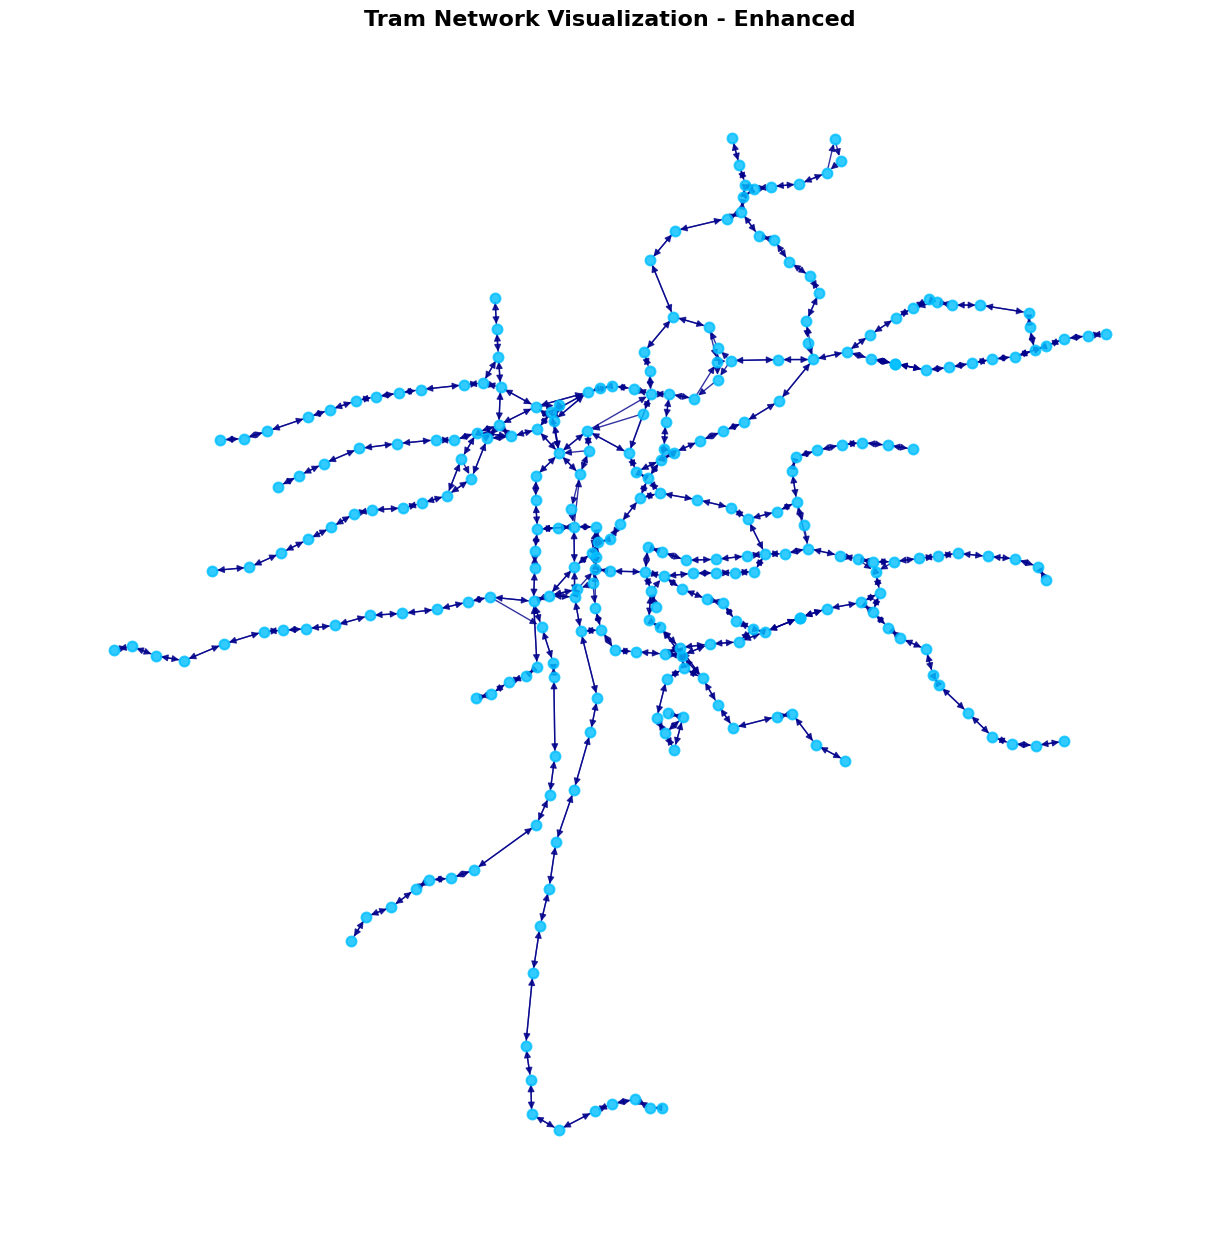

In [16]:
tram_graph = nx.DiGraph()

for _, row in tram_lines.iterrows():
    tram_graph.add_node(row['stop_from_name'], pos=row['stop_from_coords'])
    tram_graph.add_node(row['stop_to_name'], pos=row['stop_to_coords'])
    tram_graph.add_edge(row['stop_from_name'], row['stop_to_name'], weight=row['total_trips'])

positions = nx.get_node_attributes(tram_graph, 'pos')

plt.figure(figsize=(12, 12))
nx.draw(
    tram_graph,                
    pos=positions,          
    node_size=50,      
    node_color='deepskyblue', 
    edge_color='darkblue',           
    linewidths=1.5,              
    alpha=0.8,                   
    with_labels=False            
)
plt.title("Tram Network Visualization - Enhanced", fontsize=16, fontweight="bold") 
plt.axis('off') 
plt.show()

This graph represents the tram routes

# 🚎Analysis of the Importance of Stops

***Calculate Three Centrality Measures***

**1.Degree Centrality: Measures the number of connections (edges) each node has.**

**2.Closeness Centrality: Evaluates how "close" a node is to all other nodes in the network.**

**3.Betweenness Centrality: Identifies which nodes lie on the shortest paths between other nodes.**

**1.Degree centrality**

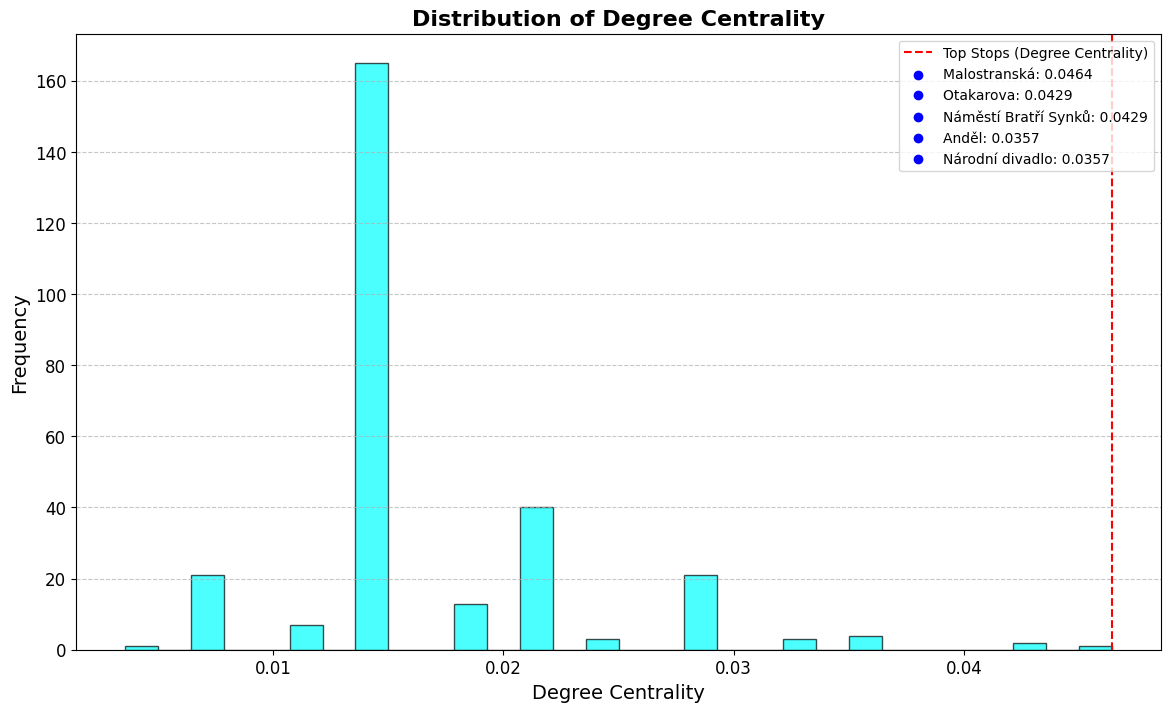

In [17]:
degree_centrality = nx.degree_centrality(tram_graph)
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_degree_named = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

degree_centrality_values = list(degree_centrality.values())
top_degree_names = [stop for stop, _ in top_degree_named]
top_degree_centralities = [centrality for _, centrality in top_degree_named]

plt.figure(figsize=(14, 8))
plt.hist(degree_centrality_values, bins=30, color='cyan', alpha=0.7, edgecolor='black')
plt.axvline(x=max(degree_centrality_values), color='red', linestyle='--', label='Top Stops (Degree Centrality)')

for i, (stop, centrality) in enumerate(top_degree_named):
    plt.scatter([], [], color='blue', label=f"{stop}: {centrality:.4f}" if i < 5 else None)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize=10, loc='upper right')

plt.title("Distribution of Degree Centrality", fontsize=16, fontweight='bold')
plt.xlabel("Degree Centrality", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The top 5 stops by **Degree Centrality**, such as **Otakarova, Malostranská, and Anděl**, are the most connected stops in the tram network. These stops serve as critical hubs, directly linking to numerous other stops and facilitating seamless transfers across routes.

**2.Closeness Centrality Analysis**

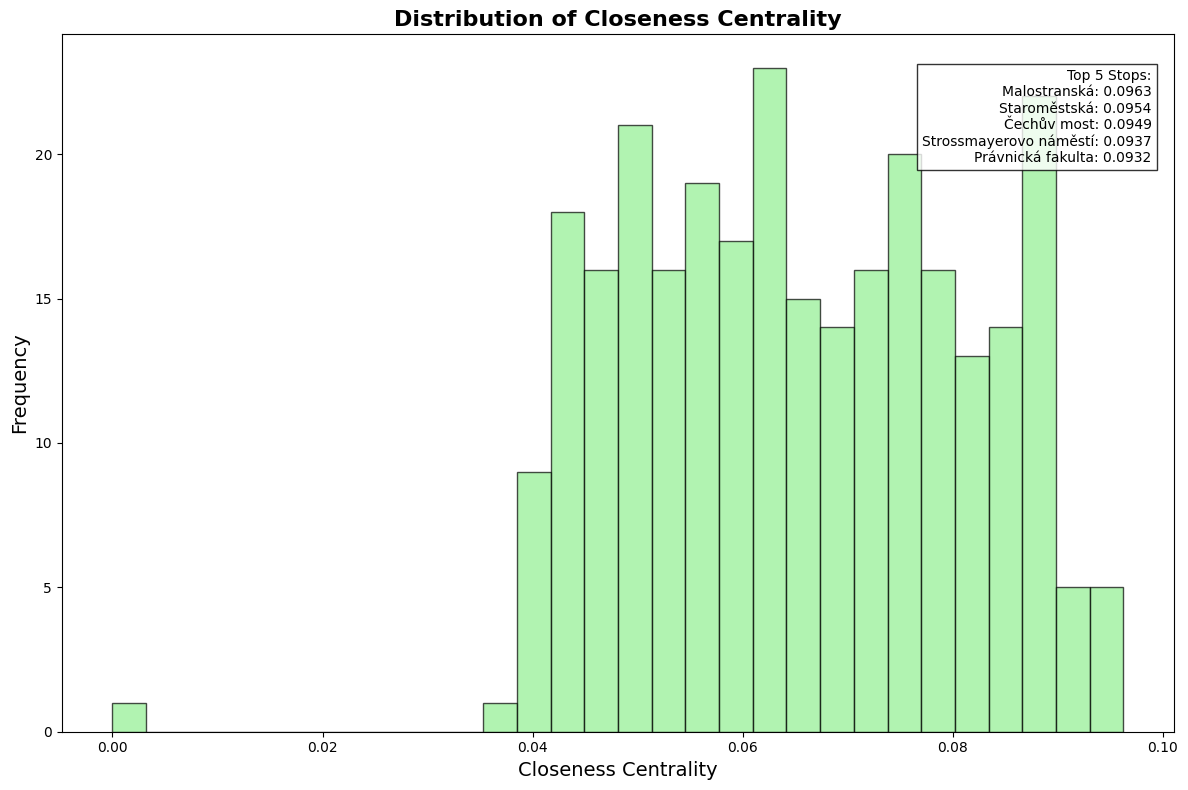

In [18]:
closeness_centrality = nx.closeness_centrality(tram_graph)
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_closeness_named = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

plt.figure(figsize=(12, 8))
plt.hist(list(closeness_centrality.values()), bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title("Distribution of Closeness Centrality", fontsize=16, fontweight='bold')
plt.xlabel("Closeness Centrality", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

legend_labels = "\n".join([f"{stop}: {centrality:.4f}" for stop, centrality in top_closeness_named])
plt.gca().text(
    0.98, 0.95, f"Top 5 Stops:\n{legend_labels}",
    fontsize=10, color='black', verticalalignment='top', horizontalalignment='right',
    transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='black', alpha=0.8)
)

plt.tight_layout()
plt.show()

The top 5 stops by **Closeness Centrality**, such as **Malostranská, Čechův most, and Staroměstská**, are strategically located to minimize travel distance to all other stops in the tram network. These stops ensure efficient access to other parts of the network, making them highly accessible and vital for connectivity.

**3.Betweenness Centrality**

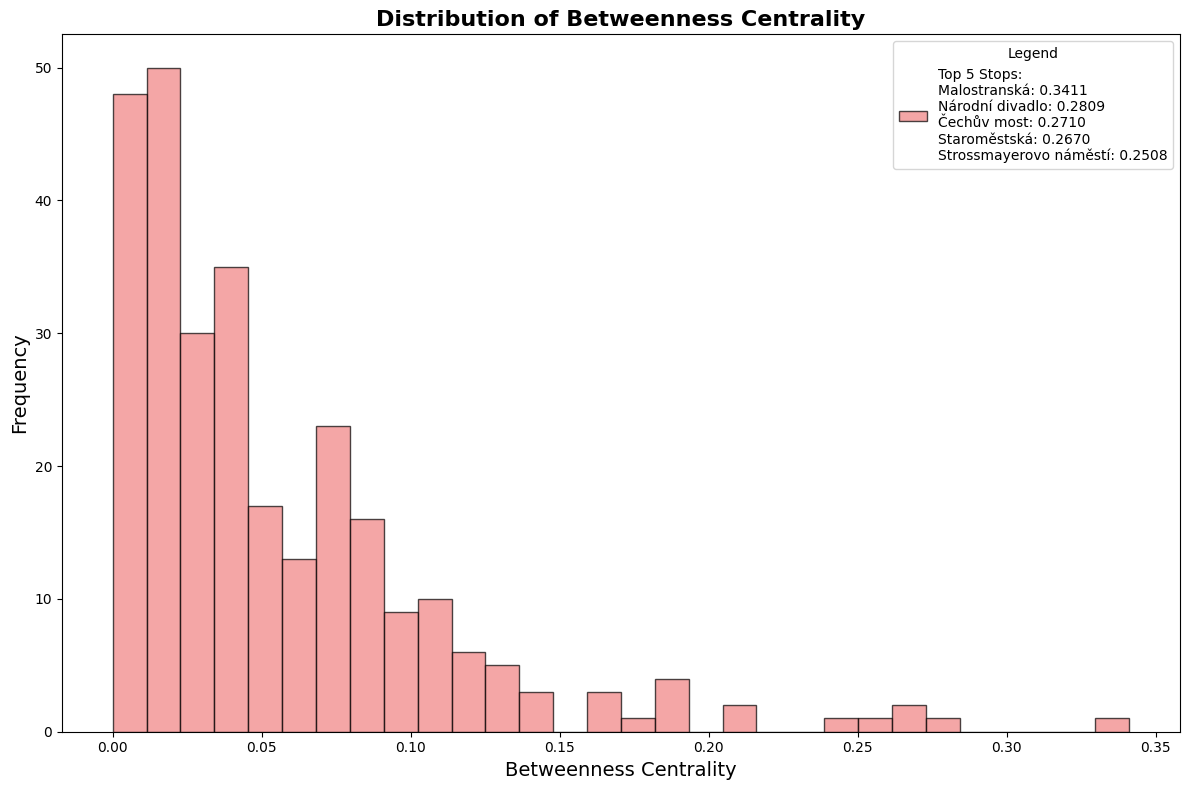

In [19]:
betweenness_centrality = nx.betweenness_centrality(tram_graph)
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_betweenness_named = [(stop_id_to_name.get(stop, stop), centrality) for stop, centrality in top_betweenness]

top_betweenness_labels = "\n".join([f"{stop}: {centrality:.4f}" for stop, centrality in top_betweenness_named])

plt.figure(figsize=(12, 8))
plt.hist(list(betweenness_centrality.values()), bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title("Distribution of Betweenness Centrality", fontsize=16, fontweight='bold')
plt.xlabel("Betweenness Centrality", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.legend([f"Top 5 Stops:\n{top_betweenness_labels}"], loc='upper right', fontsize=10, title="Legend")

plt.tight_layout()
plt.show()

The analysis of **Betweenness Centrality** reveals that the stops **Malostranská, Národní divadlo, Čechův most, Staroměstská, and Strossmayerovo náměstí** play critical roles in connecting different parts of the tram network. These stops are likely key transfer points where many shortest paths in the network converge, making them vital for efficient travel across the system.

**I decided to analyze degree centrality as it highlights the most connected tram stops in the network.**

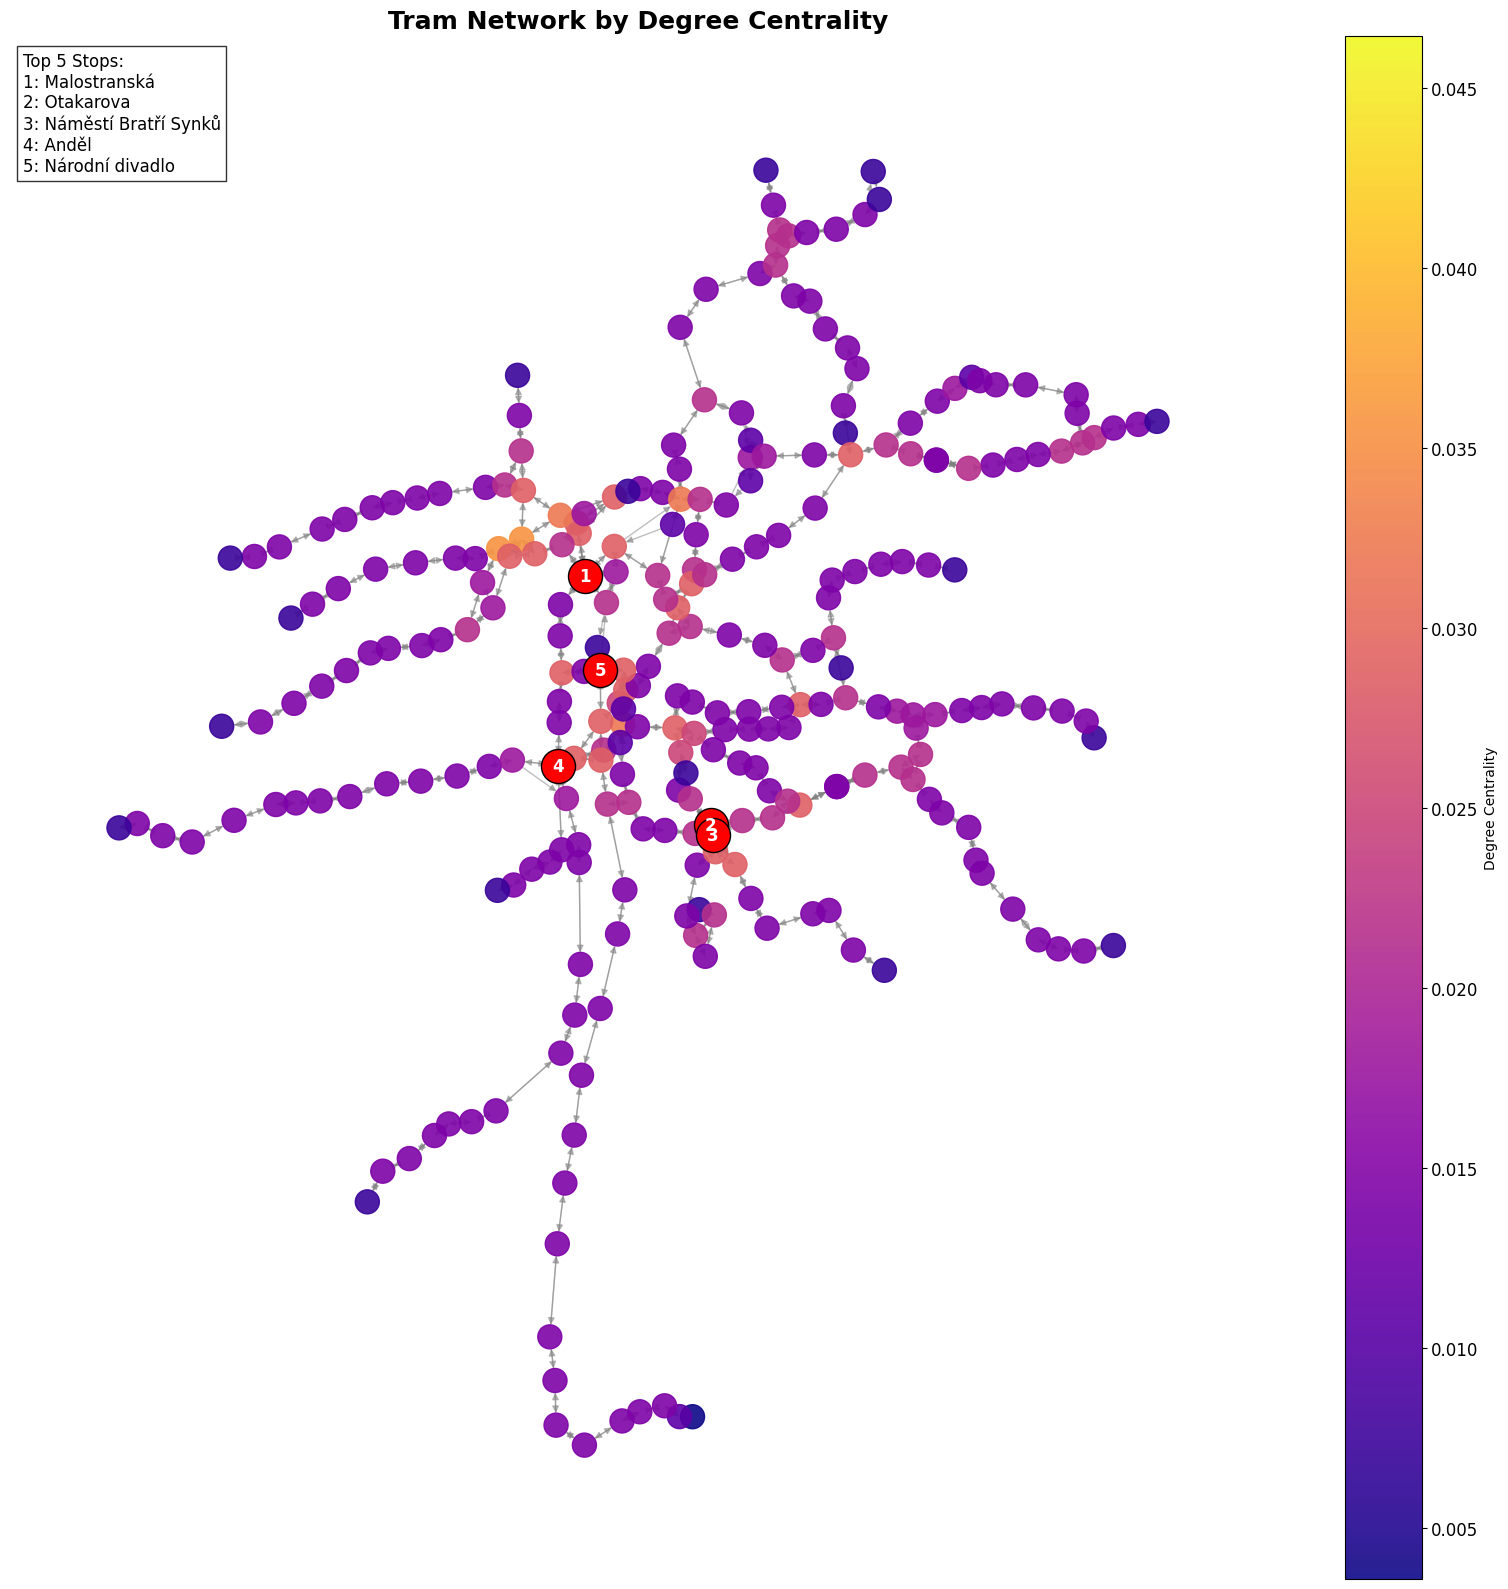

In [20]:
top_5_positions = {
    stop: positions[stop] for stop, _ in top_degree_named[:5] if stop in positions
}

plt.figure(figsize=(16, 16))

fixed_node_size = 300  
node_colors = [degree_centrality[node] for node in tram_graph.nodes()]
nodes = nx.draw_networkx_nodes(
    tram_graph,              
    positions,                
    node_size=fixed_node_size,
    node_color=node_colors,
    cmap=plt.cm.plasma,
    alpha=0.9
)

nx.draw_networkx_edges(
    tram_graph,
    positions,
    edge_color='gray',
    alpha=0.5
)

for idx, (stop, coords) in enumerate(top_5_positions.items(), start=1):
    x, y = coords
    plt.scatter(
        x, y,
        color='red',
        s=600,  
        edgecolor='black',
        zorder=5
    )
    plt.text(
        x, y,
        f"{idx}",
        fontsize=12,
        fontweight="bold",
        color="white",
        ha="center",
        va="center",
        zorder=6
    )

legend_labels = "\n".join([f"{idx}: {stop}" for idx, (stop, _) in enumerate(top_degree_named[:5], start=1)])
plt.gca().text(
    0.01, 0.99, f"Top 5 Stops:\n{legend_labels}",
    fontsize=12,
    color="black",
    verticalalignment="top",
    horizontalalignment="left",
    transform=plt.gca().transAxes,
    bbox=dict(facecolor="white", edgecolor="black", alpha=0.8)
)

colorbar = plt.colorbar(nodes, label="Degree Centrality")
colorbar.ax.tick_params(labelsize=12)

plt.title("Tram Network by Degree Centrality", fontsize=18, fontweight="bold")
plt.axis('off') 
plt.tight_layout()
plt.show()

The graph visualizes the tram network with nodes representing tram stops and edges representing connections between them. The color intensity indicates the degree centrality of each stop, with the top 5 most important stops labeled numerically. 

# ❓ Custom Questions

# 🖌️1.Is there a difference in the importance of tram stops between daytime and nighttime operations?

I will split the data into daytime and nighttime routes, create separate graphs for each time period, and calculate degree centrality for both networks. I'll identify the top 5 most important stops for both daytime and nighttime and compare them.

Splitting data into daytime and nighttime routes

In [21]:
df_tram_day = tram_lines[tram_lines['is_night'] == 0]
df_tram_night = tram_lines[tram_lines['is_night'] == 1]

Creating the graph for nighttime and nighttime routes

In [22]:
day_graph = nx.DiGraph()
for _, row in df_tram_day.iterrows():
    day_graph.add_edge(row['stop_from_name'], row['stop_to_name'], weight=row['total_trips'])

night_graph = nx.DiGraph()
for _, row in df_tram_night.iterrows():
    night_graph.add_edge(row['stop_from_name'], row['stop_to_name'], weight=row['total_trips'])

Calculating degree centrality for both graphs and calculating degree centrality for both graphs

In [23]:
degree_centrality_day = nx.degree_centrality(day_graph)
degree_centrality_night = nx.degree_centrality(night_graph)

top_5_day = sorted(degree_centrality_day.items(), key=lambda x: x[1], reverse=True)[:5]
top_5_night = sorted(degree_centrality_night.items(), key=lambda x: x[1], reverse=True)[:5]

Visualizing the top 5 for daytime and nighttime

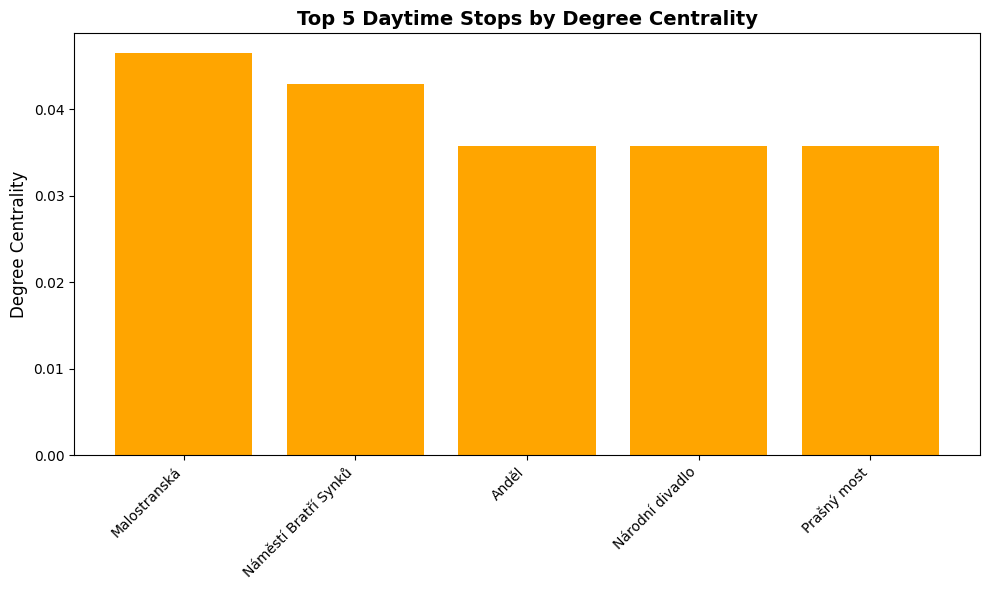

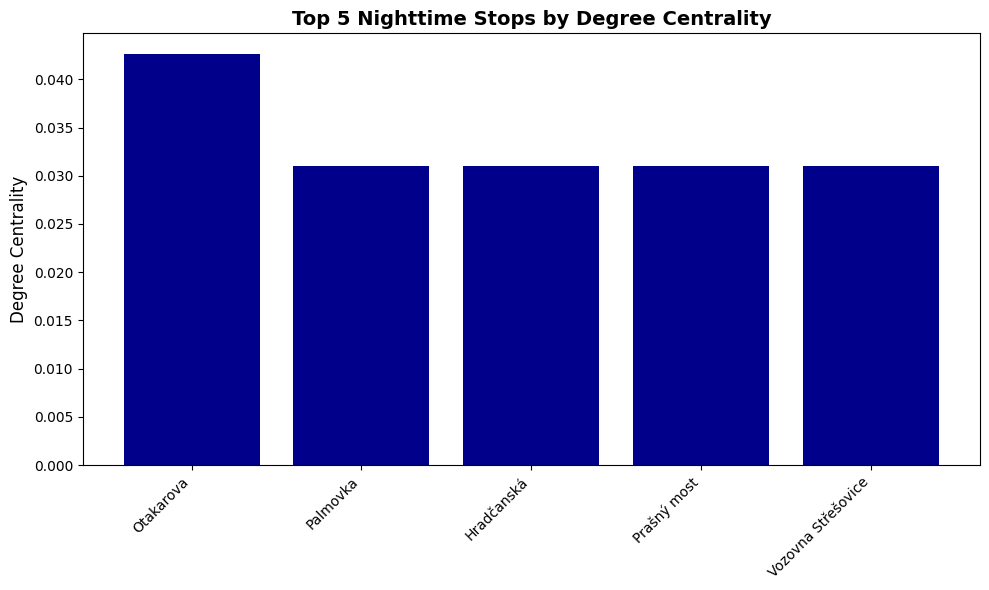

In [24]:
df_top_day = pd.DataFrame(top_5_day, columns=['Stop', 'Degree Centrality'])
plt.figure(figsize=(10, 6))
plt.bar(df_top_day['Stop'], df_top_day['Degree Centrality'], color='orange')
plt.title('Top 5 Daytime Stops by Degree Centrality', fontweight='bold', fontsize=14)
plt.ylabel('Degree Centrality', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

df_top_night = pd.DataFrame(top_5_night, columns=['Stop', 'Degree Centrality'])
plt.figure(figsize=(10, 6))
plt.bar(df_top_night['Stop'], df_top_night['Degree Centrality'], color='darkblue')
plt.title('Top 5 Nighttime Stops by Degree Centrality', fontweight='bold', fontsize=14)
plt.ylabel('Degree Centrality', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**📌Conclusion:**

1)**Daytime Stops:** Stops such as Malostranská and Náměstí Bratří Synků show the highest degree centrality, indicating their importance as key hubs during the day. These stops are likely well-connected, serving as critical points in the daytime tram network.

2)**Nighttime Stops:** The centrality shifts slightly at night, with stops like Otakarova and Palmovka becoming more prominent. This highlights a different network structure optimized for nighttime operations, where connectivity focuses on fewer, but strategically important, stops.

# 🖌️2.Which tram stop can be considered 'central' based on its average distance to all other stops?

I will use the existing tram graph to calculate the average shortest-path distance for each stop. Using this information, I will identify the most central stops in the network based on their average distances to all other stops

In [26]:
average_distances = {}
for node in tram_graph.nodes():
    total_distance = 0
    reachable_nodes = 0
    shortest_paths = nx.single_source_dijkstra_path_length(tram_graph, node, weight='weight')
    for target, dist in shortest_paths.items():
        total_distance += dist
        reachable_nodes += 1
    average_distances[node] = total_distance / reachable_nodes if reachable_nodes > 0 else float('inf')

Identify the most central stop(s) and print them

In [27]:
min_avg_distance = min(average_distances.values())
central_stops = [stop for stop, avg_dist in average_distances.items() if avg_dist == min_avg_distance]

print("Most central stop(s) based on average distance:")
for stop in central_stops:
    print(f"Stop: {stop}, Average Distance: {average_distances[stop]:.2f} km")

Most central stop(s) based on average distance:
Stop: Jiráskovo náměstí, Average Distance: 8698.26 km


Visualizing the network and highlight central stops

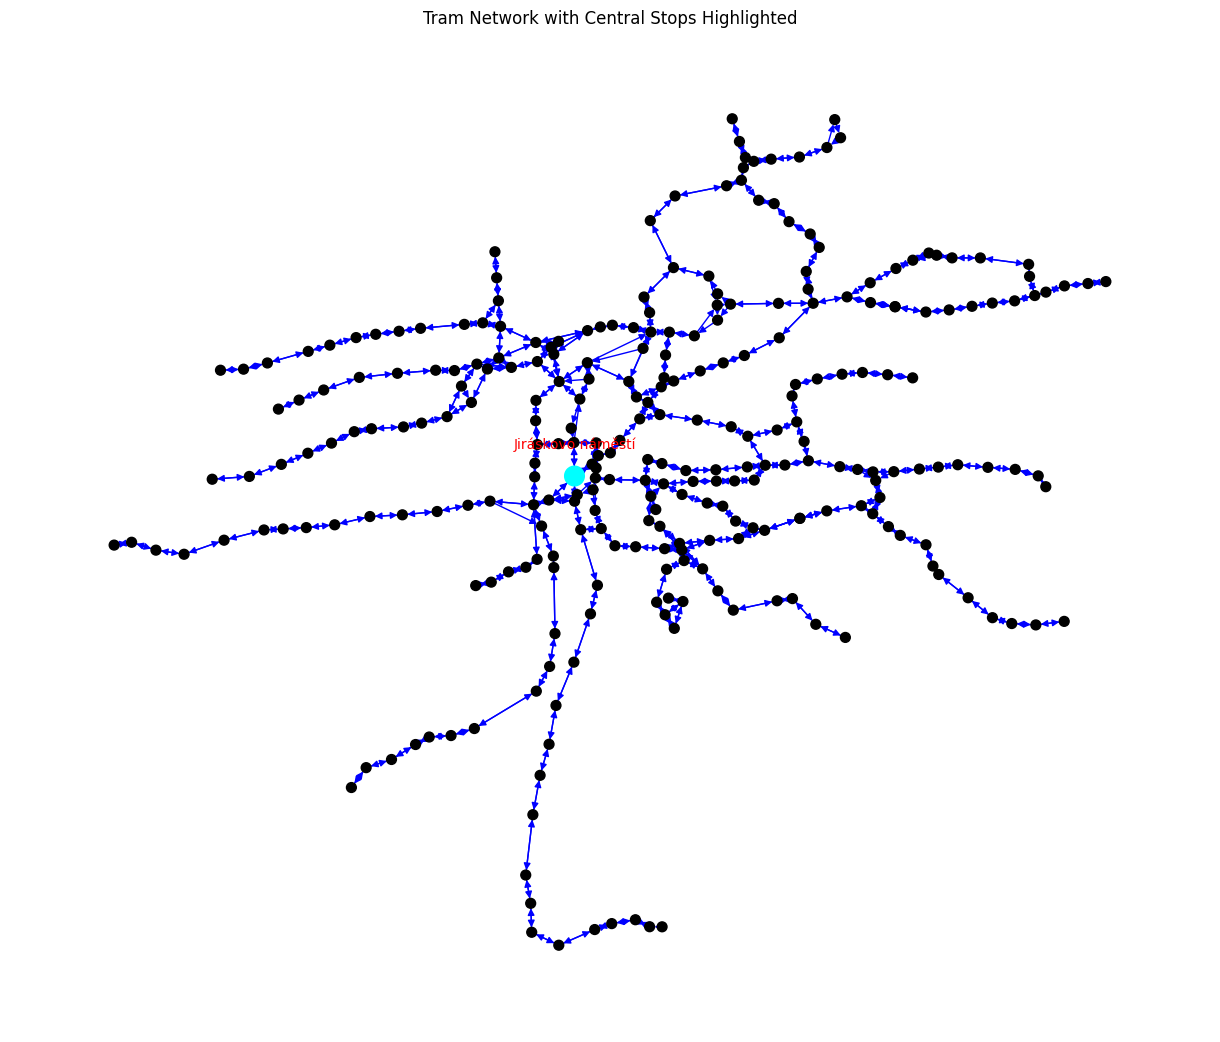

In [28]:
label_positions = {node: (x, y + 0.005) for node, (x, y) in nx.get_node_attributes(tram_graph, 'pos').items() if node in central_stops}

plt.figure(figsize=(12, 10))
positions = nx.get_node_attributes(tram_graph, 'pos')

nx.draw(
    tram_graph, positions,
    node_color=['cyan' if node in central_stops else 'black' for node in tram_graph.nodes()],
    node_size=[200 if node in central_stops else 50 for node in tram_graph.nodes()],
    edge_color='blue', linewidths=1, with_labels=False
)

nx.draw_networkx_labels(tram_graph, label_positions, labels={node: node for node in central_stops}, font_size=10, font_color='red')

plt.title("Tram Network with Central Stops Highlighted")
plt.axis('off')
plt.show()

**📌Conclusion:**
The tram network graph highlights Jirásekovo náměstí as the most central stop, ensuring excellent connectivity within the network. Central stops are located in key urban areas where tram lines converge, optimizing transit efficiency. Peripheral stops have lower centrality, reflecting their role in connecting suburban areas to the main network.

# 🖌️3.What are least 5 connected tram stops?

Calculate the degree of each stop

In [29]:
degree_dict = dict(tram_graph.degree())
sorted_stops_by_degree = sorted(degree_dict.items(), key=lambda x: x[1])  
top_least_connected_stops = [stop for stop, _ in sorted_stops_by_degree[:5]]  
print(f"Top 5 least connected stops:")
print(top_least_connected_stops)

Top 5 least connected stops:
['Levského', 'Sídliště Řepy', 'Spojovací', 'Mezi Hřbitovy', 'Vozovna Pankrác']


Visualize the graph with the least connected stops highlighted

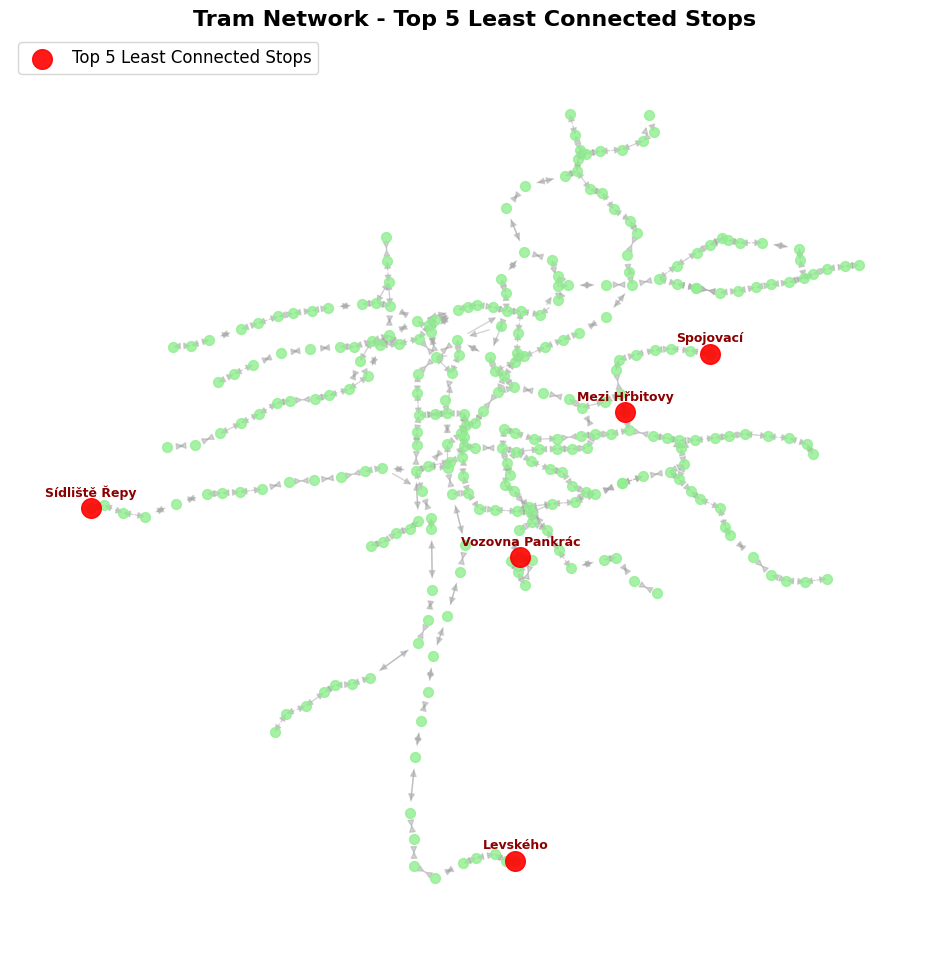

In [30]:
plt.figure(figsize=(12, 12))

positions = nx.get_node_attributes(tram_graph, 'pos')

nx.draw_networkx_nodes(
    tram_graph,
    positions,
    node_size=50,
    node_color='lightgreen', 
    alpha=0.8
)

nx.draw_networkx_nodes(
    tram_graph,
    positions,
    nodelist=top_least_connected_stops,
    node_size=200,  
    node_color='red',  
    alpha=0.9,
    label="Top 5 Least Connected Stops"
)

for stop in top_least_connected_stops:
    x, y = positions[stop]
    plt.text(
        x, y + 0.002,  
        stop,
        fontsize=9,
        fontweight="bold",
        color="darkred",
        horizontalalignment="center"
    )

nx.draw_networkx_edges(
    tram_graph,
    positions,
    edge_color='darkgray',  
    alpha=0.5
)

plt.legend(scatterpoints=1, loc='upper left', fontsize=12)
plt.title("Tram Network - Top 5 Least Connected Stops", fontsize=16, fontweight='bold')
plt.axis('off')
plt.show()

**📌Conclusion:**
This visualization highlights the **top 5 least connected tram stops** within the network, shown in red. These stops, such as **Levského and Spojovací**, have the lowest number of direct connections , indicating their peripheral placement or limited connectivity within the tram system


# FINISH!!!🏁🏁🏁🏁🏁🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳🥳